<a href="https://colab.research.google.com/github/nithin24011/Nithin_INFO5731_Spring2020/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
# Write your code here
import pandas as pd
import requests
from bs4 import BeautifulSoup
def insert_into_array(values,refer_array):
  for i in values:
    refer_array.append(i.text)
titles=[]
for i in range(0,100,10):
  URL="http://citeseerx.ist.psu.edu/search?q=data+science&t=doc&sort=rlv&start="+str(i)
  page=requests.get(URL,headers={'User-Agent':'Chrome/85.0.4183.121'})
  soup = BeautifulSoup(page.content, 'html.parser')
  insert_into_array(soup.find_all('a', class_='remove doc_details'),titles)
print(titles)
df = pd.DataFrame (titles,columns=['titles'])

['\nData Streams: Algorithms and Applications\n                  ', '\n                  Bayesian Data Analysis\n                  ', '\n                  Voronoi diagrams -- a survey of a fundamental geometric data structure\n                  ', '\n                  From Data Mining to Knowledge Discovery in Databases.\n                  ', '\n                  Survey of clustering algorithms\n                  ', '\n                  Thresholding of statistical maps in functional neuroimaging using the false discovery rate.\n                  ', '\n                  Maintaining knowledge about temporal intervals\n                  ', '\n                  Status quo bias in decision making\n                  ', '\n                  Rough Sets.\n                  ', '\n                  Modeling TCP Throughput: A Simple Model and its Empirical Validation\n                  ', '\n                  Compressive sampling\n                  ', '\n                  Search and replication in

In [3]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=17896a459c99177b96b07312ea976ad42939f2271d8af3583c883720df8c8b18
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [4]:
import nltk; nltk.download('stopwords')


import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [5]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
data_words = list(sent_to_words(titles))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

print(data_words[:1])
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def m_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = m_bigrams(data_words_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[['data', 'streams', 'algorithms', 'and', 'applications']]
[[]]
[[]]
[(0,
  '0.061*"selection" + 0.061*"datum" + 0.031*"seek" + 0.031*"rational" + '
  '0.031*"income" + 0.031*"happiness" + 0.031*"aspiration" + 0.031*"science" + '
  '0.031*"role" + 0.031*"medium"'),
 (1,
  '0.111*"datum" + 0.067*"science" + 0.023*"curriculum" + 0.023*"technique" + '
  '0.023*"program" + 0.023*"parallelism" + 0.023*"non" + 0.023*"validation" + '
  '0.023*"selection" + 0.023*"natural"'),
 (2,
  '0.033*"academic" + 0.033*"classroom" + 0.033*"self" + 0.033*"regulate" + '
  '0.033*"performance" + 0.033*"motivational" + 0.033*"learn" + 0.033*"round" '
  '+ 0.033*"object" + 0.033*"datum"'),
 (3,
  '0.029*"special" + 0.029*"editorial" + 0.029*"model" + 0.029*"software" + '
  '0.029*"prediction" + 0.029*"defect" + 0.029*"imbalanced" + 0.029*"issue" + '
  '0.029*"set" + 0.029*"inspire"'),
 (4,
  '0.044*"basic" + 0.044*"matrix" + 0.044*"geometry" + 0.044*"computation" + '
  '0.044*"kit" + 0.044*"selfish" + 0.044*"

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [6]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [8]:
def preprocess_data(docu_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in docu_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
      model = LsiModel(doc_term_matrix, num_topics, id2word = dictionary)  # train model
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
def graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

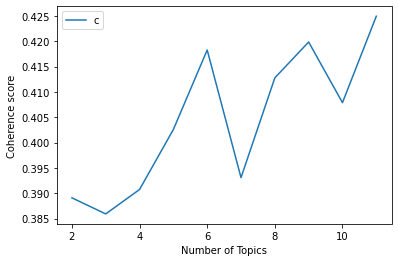

In [9]:
start,stop,step=2,12,1
clean_text=preprocess_data(titles)
graph(clean_text,start,stop,step)

In [10]:
number_of_topics=2
words=10
clean_text=preprocess_data(titles)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.763*"data" + 0.587*"scienc" + 0.077*"big" + 0.061*"comput" + 0.057*"1" + 0.056*"statist" + 0.051*"new" + 0.047*"educ" + 0.045*"peer" + 0.044*"earth"'), (1, '0.446*"peer" + 0.372*"earth" + 0.354*"write" + 0.354*"review" + 0.221*"1" + -0.221*"data" + 0.213*"educ" + 0.192*"larg" + 0.177*"gener" + 0.177*"oceanographi"')]


## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

LDA has 19 point models, while LSA has two theme models; however, while the number of terms in both models is the same, LSA has less dimensions than LDA. LSA is faster than LDA since it only has two topic models. Despite the fact that the yields of both models are comparable, both have preprocessing measures to lemmatize the sentences, and LDA is carried out using a diricilet strategy, while LSA is carried out in a probabilistic manner.